In [9]:
import numpy as np
from universe import Universe
from barneshut import BarnesHutUniverse
from acceleration import pairwise
import time
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

In [3]:
G = 0.01
SOFTENING = 0.01
DT = 0.01

In [4]:
Ns = [10, 100, 1000, 10000]
ITERS = [200, 20, 20, 2]

In [5]:
names = ["Numpy Roll", "Pairwise", "Barnes-Hut"]
time_histories = {name:[] for name in names}
for N, ITER in zip(Ns, ITERS):
    s = np.random.uniform(-1, 1, (N, 2))
    v = np.zeros_like(s)
    uni_numpy = Universe(N, G, SOFTENING, DT, s.copy(), v.copy(), world_size=2)
    uni_pairwise = Universe(N, G, SOFTENING, DT, s.copy(), v.copy(), world_size=2)
    uni_barnes_hut = BarnesHutUniverse(N, G, SOFTENING, DT, s.copy(), v.copy(), world_size=2)

    uni_pairwise.calc_acceleration = pairwise(uni_pairwise.force, uni_pairwise.m, uni_pairwise.q)

    
    universes = {names[0]:uni_numpy,
                 names[1]:uni_pairwise,
                 names[2]:uni_barnes_hut}
    

    for name in names:
        t1 = time.perf_counter()
        for i in range(ITER):
            unierses[name].update()
        t2 = time.perf_counter()
        time_histories[name].append((t2-t1)/ITER)
        print(f"{name}\t{N=}\t{ITER=}\tdelta_t={t2-t1:.3f}")

Numpy Roll		 N=10		 ITER=200		 delta_t=0.140
Pairwise		 N=10		 ITER=200		 delta_t=0.137
Barnes-Hut		 N=10		 ITER=200		 delta_t=0.781
Numpy Roll		 N=100		 ITER=20		 delta_t=0.114
Pairwise		 N=100		 ITER=20		 delta_t=1.458
Barnes-Hut		 N=100		 ITER=20		 delta_t=1.608
Numpy Roll		 N=1000		 ITER=20		 delta_t=2.242
Pairwise		 N=1000		 ITER=20		 delta_t=141.168
Barnes-Hut		 N=1000		 ITER=20		 delta_t=24.584
Numpy Roll		 N=10000		 ITER=2		 delta_t=11.925
Pairwise		 N=10000		 ITER=2		 delta_t=1439.281
Barnes-Hut		 N=10000		 ITER=2		 delta_t=28.097


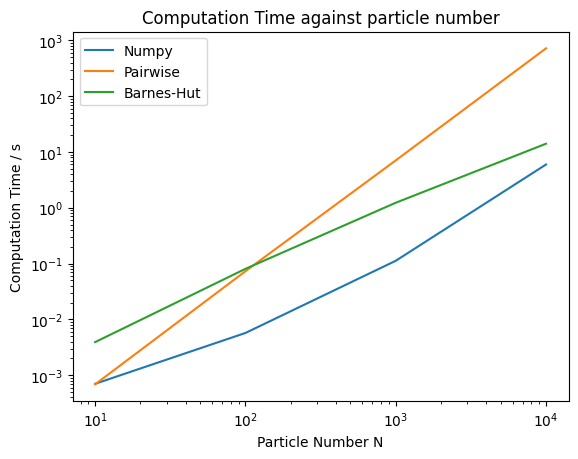

In [14]:
plt.plot(Ns, numpy_time_history, label="Numpy")
plt.plot(Ns, pairwise_time_history, label="Pairwise")
plt.plot(Ns, barnes_time_history, label="Barnes-Hut")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.title("Computation Time against particle number")
plt.xlabel("Particle Number N")
plt.ylabel("Computation Time / s")
plt.savefig("figures/timings.png", dpi=300)